In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
df = pd.read_csv('harth_S028.csv')
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.871582,-0.103760,-0.352051,-1.070068,0.168213,-0.093994,6
1,2019-01-12 00:00:00.020,-0.943359,0.007812,-0.270508,-1.140625,-0.094971,0.015381,6
2,2019-01-12 00:00:00.040,-1.041748,0.069092,-0.315430,-1.019531,-0.159912,-0.144775,6
3,2019-01-12 00:00:00.060,-1.133301,0.018555,-0.313477,-0.958252,-0.141602,-0.159668,6
4,2019-01-12 00:00:00.080,-1.087646,-0.022461,-0.271240,-0.896729,-0.131836,-0.035400,6


In [3]:
df = df.drop('timestamp', axis =1)

In [4]:
df

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.871582,-0.103760,-0.352051,-1.070068,0.168213,-0.093994,6
1,-0.943359,0.007812,-0.270508,-1.140625,-0.094971,0.015381,6
2,-1.041748,0.069092,-0.315430,-1.019531,-0.159912,-0.144775,6
3,-1.133301,0.018555,-0.313477,-0.958252,-0.141602,-0.159668,6
4,-1.087646,-0.022461,-0.271240,-0.896729,-0.131836,-0.035400,6
...,...,...,...,...,...,...,...
165173,-1.112549,-0.020752,-0.238281,-0.990234,0.067871,0.150146,3
165174,-1.163574,-0.036621,-0.275635,-1.096436,-0.043457,0.097168,3
165175,-1.278076,-0.054932,-0.315674,-1.230713,-0.177979,0.078125,3
165176,-1.360596,-0.058350,-0.342529,-1.265381,-0.165527,0.113281,3


In [5]:
target = df['label']
df = df.drop('label', axis  =1)
target

0         6
1         6
2         6
3         6
4         6
         ..
165173    3
165174    3
165175    3
165176    3
165177    3
Name: label, Length: 165178, dtype: int64

In [6]:
target.value_counts()

label
1    147858
6      8475
7      2740
3      2081
8      1652
5      1316
4      1056
Name: count, dtype: int64

In [7]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
count,165178.000000,165178.000000,165178.000000,165178.000000,165178.000000,165178.000000
mean,-1.012984,-0.060648,-0.298160,-1.046097,-0.087043,-0.173465
std,0.318585,0.181329,0.260232,0.732322,0.626527,0.726746
min,-4.363037,-2.300293,-3.231445,-7.995361,-4.999756,-5.487305
25%,-1.239014,-0.149414,-0.398193,-1.466309,-0.252686,-0.570068
50%,-1.000854,-0.036621,-0.250244,-0.984375,-0.062256,-0.107910
75%,-0.763184,0.050049,-0.172119,-0.618896,0.058594,0.222412
max,0.024902,0.868652,1.013672,2.487061,5.979248,4.943115


In [8]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_standardized.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
count,1.651780e+05,1.651780e+05,1.651780e+05,1.651780e+05,1.651780e+05,1.651780e+05
mean,-3.464572e-16,-5.850283e-17,1.408370e-16,-2.720382e-16,-2.776734e-17,-4.529668e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.051546e+01,-1.235131e+01,-1.127184e+01,-9.489380e+00,-7.841212e+00,-7.311849e+00
25%,-7.094840e-01,-4.895324e-01,-3.843992e-01,-5.738088e-01,-2.643841e-01,-5.457262e-01
50%,3.807347e-02,1.325040e-01,1.841296e-01,8.428316e-02,3.956239e-02,9.020358e-02
75%,7.840960e-01,6.104760e-01,4.843433e-01,5.833531e-01,2.324518e-01,5.447269e-01
max,3.257815e+00,5.124948e+00,5.041024e+00,4.824609e+00,9.682445e+00,7.040418e+00


In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_standardized, target, test_size=0.2, random_state=43)

In [10]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
knn.fit(Xtrain, Ytrain)
predict = knn.predict(Xtest)

              precision    recall  f1-score   support

           1     0.9875    0.9932    0.9904     29622
           3     0.6766    0.5205    0.5884       438
           4     0.7531    0.6256    0.6835       195
           5     0.7603    0.3770    0.5041       244
           6     0.9123    0.9562    0.9337      1665
           7     0.9889    0.9981    0.9935       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9785     33036
   macro avg     0.8684    0.7815    0.8134     33036
weighted avg     0.9767    0.9785    0.9769     33036



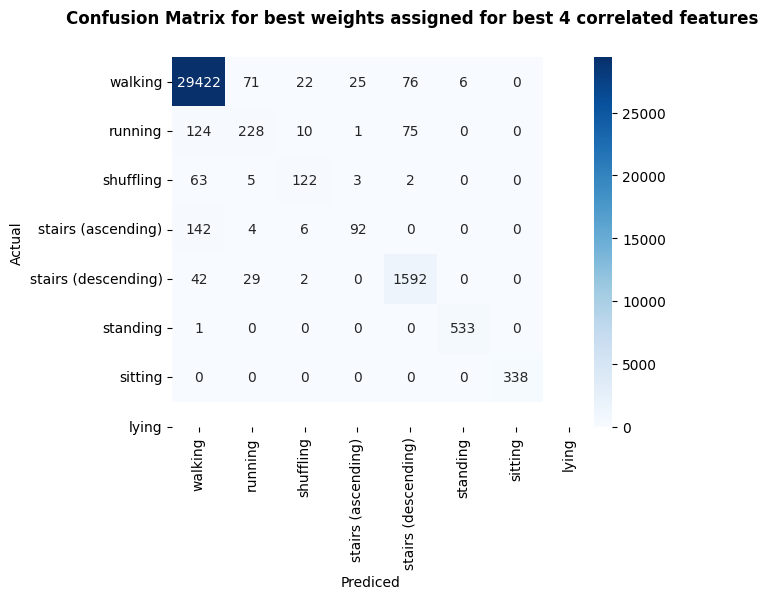

In [12]:
cm = confusion_matrix(Ytest, predict)
report = classification_report(Ytest, predict, digits =4)
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.suptitle("Confusion Matrix for best weights assigned for best 4 correlated features", fontweight='bold')
print(report)

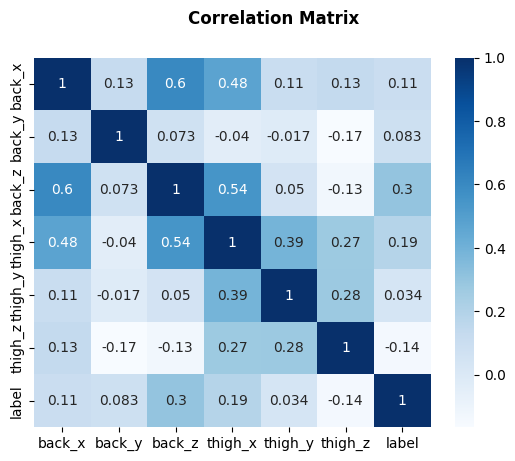

In [13]:
tempDf = pd.concat([df,target], axis = 1)
corMat = tempDf.corr()
plt.suptitle("Correlation Matrix", fontweight='bold')
sb.heatmap(corMat, cmap = 'Blues', annot = True)
plt.show()

Text(0, 0.5, 'Features')

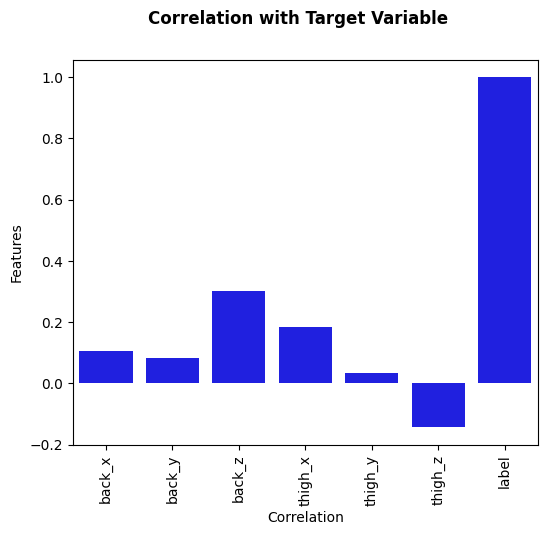

In [14]:
corrValues = corMat['label']
plt.figure(figsize=(6, 5))
sb.barplot(x=corrValues.index, y=corrValues.values, color='b')
plt.suptitle("Correlation with Target Variable", fontweight='bold')
plt.xlabel('Correlation')
plt.xticks(rotation='vertical')
plt.ylabel('Features')

In [15]:
np.random.seed(10)
weights = np.random.random(6)
wKnn = KNeighborsClassifier(metric = 'wminkowski', p = 2, metric_params = {'w':weights})

In [16]:
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665])

In [17]:
wKnn.fit(Xtrain, Ytrain)
Wpredict = wKnn.predict(Xtest)

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_base.py:646: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  self._tree = BallTree(


              precision    recall  f1-score   support

           1     0.9847    0.9934    0.9890     29622
           3     0.5908    0.4384    0.5033       438
           4     0.6763    0.4821    0.5629       195
           5     0.7100    0.2910    0.4128       244
           6     0.9084    0.9351    0.9216      1665
           7     0.9870    0.9925    0.9897       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9749     33036
   macro avg     0.8367    0.7332    0.7685     33036
weighted avg     0.9720    0.9749    0.9725     33036



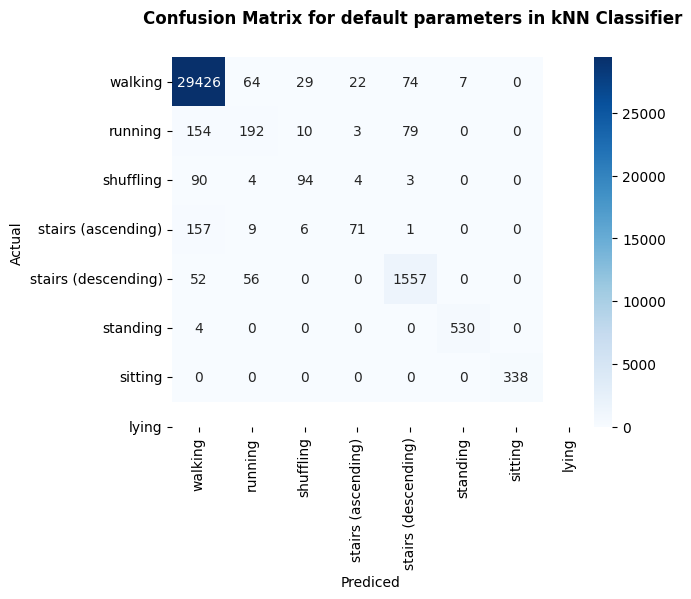

In [18]:
cm = confusion_matrix(Ytest, Wpredict)
report = classification_report(Ytest, Wpredict, digits =4)
plt.suptitle("Confusion Matrix for default parameters in kNN Classifier", fontweight='bold')
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
print(report)

In [19]:
temp= corMat.iloc[-1,:-1]
temp

back_x     0.106879
back_y     0.083453
back_z     0.301565
thigh_x    0.185699
thigh_y    0.034454
thigh_z   -0.143146
Name: label, dtype: float64

In [20]:
high_corr = temp.nlargest(4).index
high_index = temp.index.get_indexer(high_corr)

new_weights = np.copy(weights)
new_weights[high_index] = [4, 3, 2, 1]
#new_weights
high_corr
new_weights

array([2.        , 1.        , 4.        , 3.        , 0.49850701,
       0.22479665])

In [21]:
tKnn = KNeighborsClassifier(metric = 'wminkowski', p = 2, metric_params = {'w':new_weights})

In [22]:
tKnn.fit(Xtrain, Ytrain)
tpredict = tKnn.predict(Xtest)

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_base.py:646: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  self._tree = BallTree(


              precision    recall  f1-score   support

           1     0.9837    0.9926    0.9881     29622
           3     0.6099    0.3927    0.4778       438
           4     0.7288    0.4410    0.5495       195
           5     0.7170    0.1557    0.2559       244
           6     0.8775    0.9465    0.9107      1665
           7     0.9499    0.9944    0.9716       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9730     33036
   macro avg     0.8381    0.7033    0.7362     33036
weighted avg     0.9695    0.9730    0.9693     33036



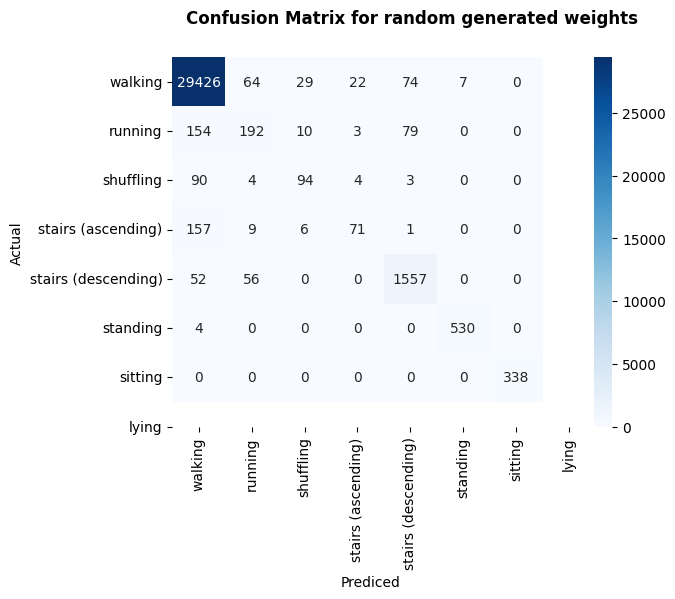

In [23]:
cm = confusion_matrix(Ytest, Wpredict)
report = classification_report(Ytest, tpredict, digits =4)
plt.suptitle("Confusion Matrix for random generated weights", fontweight='bold')
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
print(report)

In [24]:
# Search space for k (from 1 to 30 with a step size of 2)
k_values = np.arange(1, 31, 2)

# Initialize a dictionary to store the mean accuracy for each k
k_accuracy = {}

# Perform k-fold cross-validation for each value of k
k_fold = 10  # Number of folds for cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=k_fold, scoring='accuracy')
    k_accuracy[k] = scores.mean()

# Find the optimum value of k with the highest accuracy
best_k = max(k_accuracy, key=k_accuracy.get)
best_accuracy = k_accuracy[best_k]

print(f"\nBest k: {best_k}, Best Mean Accuracy: {best_accuracy}")


Best k: 3, Best Mean Accuracy: 0.9807252738341872


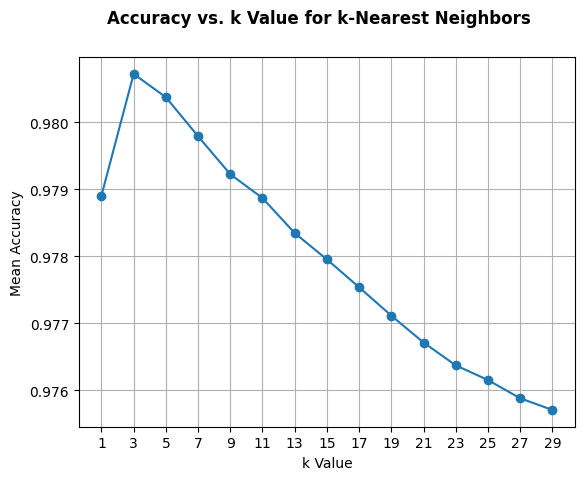

In [25]:
# Plot the graph for accuracy vs. k value
plt.plot(k_accuracy.keys(), k_accuracy.values(), marker='o')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.suptitle("Accuracy vs. k Value for k-Nearest Neighbors", fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

knn_classifier.fit(Xtrain, Ytrain)

opredict = knn_classifier.predict(Xtest)

              precision    recall  f1-score   support

           1     0.9878    0.9935    0.9906     29622
           3     0.7006    0.5183    0.5958       438
           4     0.7423    0.6205    0.6760       195
           5     0.7368    0.4016    0.5199       244
           6     0.9160    0.9622    0.9385      1665
           7     0.9907    0.9981    0.9944       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9791     33036
   macro avg     0.8678    0.7849    0.8165     33036
weighted avg     0.9773    0.9791    0.9776     33036



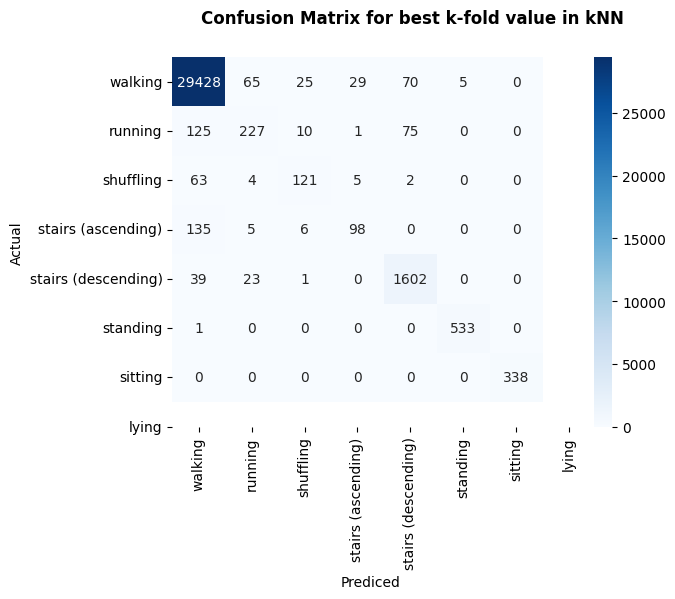

In [27]:
cm = confusion_matrix(Ytest, opredict)
report = classification_report(Ytest, opredict, digits =4)
print(report)
plt.suptitle("Confusion Matrix for best k-fold value in kNN", fontweight='bold')
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

In [28]:
# Standardize the data
new_scaler = StandardScaler()
new_df_standardized = pd.DataFrame(new_scaler.fit_transform(df), columns=df.columns)

# Split the data into training and testing sets
nXtrain, nXtest, nYtrain, nYtest = train_test_split(new_df_standardized, target, test_size=0.2, random_state=43)

# Create a kNN classifier
best_knn = KNeighborsClassifier()

# Perform feature selection using Mutual Information (SelectKBest)
num_features = 4  # Number of features to select
selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
Xtrain_selected = selector.fit_transform(nXtrain, nYtrain)
Xtest_selected = selector.transform(nXtest)

# Fit kNN classifier on selected features
best_knn.fit(Xtrain_selected, Ytrain)
predict = best_knn.predict(Xtest_selected)

              precision    recall  f1-score   support

           1     0.9830    0.9927    0.9878     29622
           3     0.5737    0.3288    0.4180       438
           4     0.6905    0.4462    0.5421       195
           5     0.7000    0.2869    0.4070       244
           6     0.8803    0.9321    0.9055      1665
           7     0.9815    0.9963    0.9888       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9726     33036
   macro avg     0.8299    0.7118    0.7499     33036
weighted avg     0.9687    0.9726    0.9694     33036



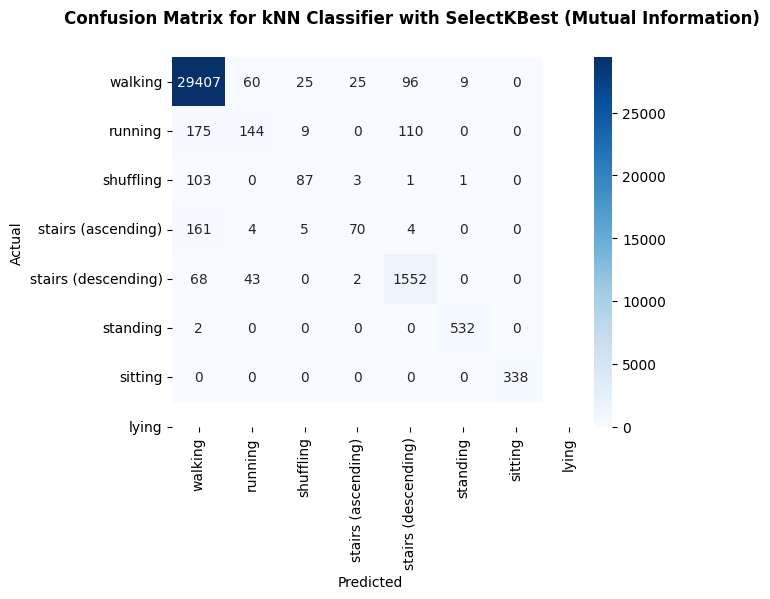

In [29]:
# Generate confusion matrix and classification report for kNN
cm = confusion_matrix(nYtest, predict)
report = classification_report(nYtest, predict, digits=4)
print(report)

# Visualize confusion matrix
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.suptitle("Confusion Matrix for kNN Classifier with SelectKBest (Mutual Information)", fontweight='bold')
plt.show()

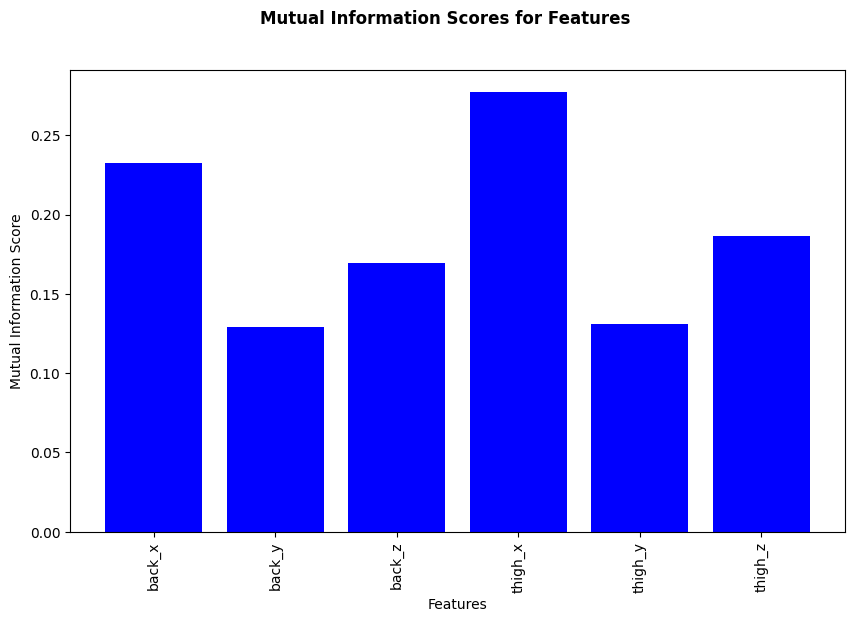

In [30]:
# Get feature names and their corresponding Mutual Information scores
feature_names = df.columns
mi_scores = selector.scores_

# Plot Mutual Information scores for each feature
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.suptitle("Mutual Information Scores for Features", fontweight='bold')
plt.xticks(rotation='vertical')
plt.show()

In [31]:
knn_cosine = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')

In [32]:
knn_cosine.fit(Xtrain, Ytrain)
cpredict = knn_cosine.predict(Xtest)

              precision    recall  f1-score   support

           1     0.9836    0.9920    0.9878     29622
           3     0.6310    0.4178    0.5027       438
           4     0.6626    0.5538    0.6034       195
           5     0.6133    0.3770    0.4670       244
           6     0.9056    0.9051    0.9054      1665
           7     0.9603    0.9963    0.9779       534
           8     1.0000    1.0000    1.0000       338

    accuracy                         0.9731     33036
   macro avg     0.8223    0.7489    0.7777     33036
weighted avg     0.9701    0.9731    0.9710     33036



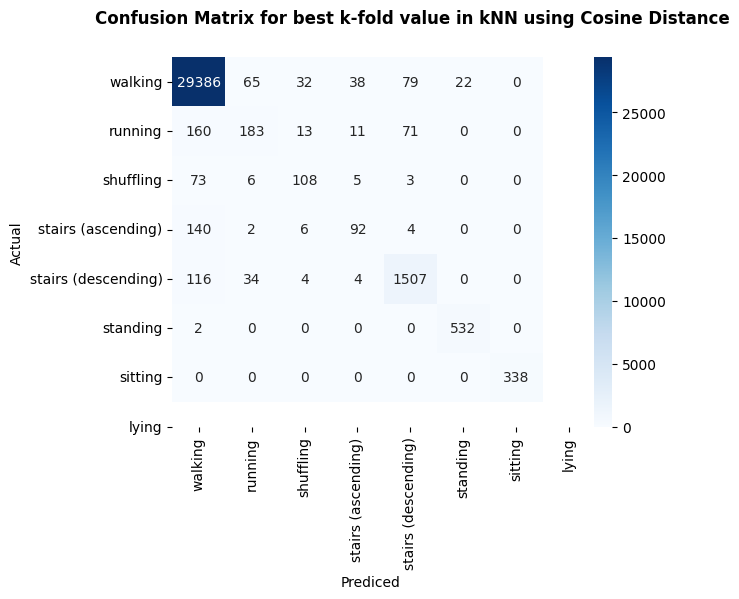

In [33]:
cm = confusion_matrix(Ytest, cpredict)
report = classification_report(Ytest, cpredict, digits =4)
print(report)
plt.suptitle("Confusion Matrix for best k-fold value in kNN using Cosine Distance", fontweight='bold')
sb.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'],
           yticklabels=['walking', 'running', 'shuffling', 'stairs (ascending)', 'stairs (descending)', 'standing', 'sitting', 'lying'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()